In [1]:
import pymysql #Allows the connection to mysql
import pandas as pd #We need pandas to obtain a Data Frame
import getpass # function to prompt a cell to write down our password
from sqlalchemy import create_engine #Method to produce an engine based on a URL, that includes, host, user....
import matplotlib.pyplot as plt #Importing this library for plot generation

In [2]:
user = getpass.getuser()
password = getpass.getpass(prompt="Please enter your MySQL password",stream=None)
engine = create_engine('mysql+pymysql://{}:{}@localhost:3306/classicmodels'.format(user,password))
connection = pymysql.connect(host='localhost',user=user,password=password,db='classicmodels')

Please enter your MySQL password········


In [3]:
a="""SELECT  customerName,
        SUM(quantityOrdered*priceEach) AS totalSpent
FROM    orderdetails JOIN
        orders USING (orderNumber) JOIN
        customers USING (customerNumber)
GROUP BY    customerNumber
ORDER BY    totalSpent DESC;""" 

In [4]:
customerByrevenue=pd.read_sql_query(a,engine)

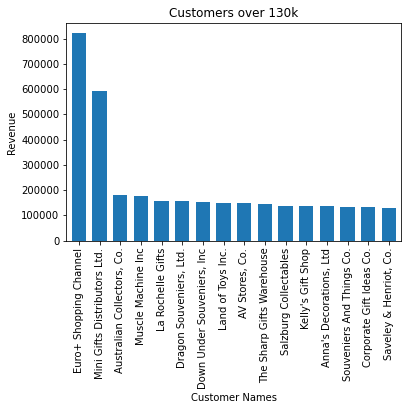

In [5]:
pd.DataFrame(customerByrevenue, columns=['customerName', 'totalSpent' ])#Creating the data frame
customerByrevenue2=customerByrevenue[customerByrevenue['totalSpent']>130000].reset_index()#Only customers with 130k
customerByrevenue2.plot(kind='bar',x='customerName',y='totalSpent',legend=None,width=0.7)#Creating the plot
plt.xlabel('Customer Names');plt.ylabel('Revenue');
plt.title("Customers over 130k")
plt.show()